<a href="https://colab.research.google.com/github/kjahan/semantic_similarity/blob/main/examples/colab/short_text_embeddings_sbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install necessary packages**

[Semantic Textual Similarity](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)


In [4]:
!pip install -U sentence-transformers
!pip3 install seaborn

In [2]:
from sentence_transformers import SentenceTransformer, util

import numpy as np
import seaborn as sns
import pandas as pd

import random
import re
import itertools

**Semantic similarity**

In [3]:
model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Test short query embeddings

In [8]:
queries_1 = ['econ 101', 'math 200 assignment', 'econ 300 exam']
queries_2 = ['economics 101', 'math 200 homework', 'econ 300 midterm']


In [9]:
# Compute embedding for both lists
embeddings1 = model.encode(queries_1, convert_to_tensor=True)
embeddings2 = model.encode(queries_1, convert_to_tensor=True)

# Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)

# Output the pairs with their score
for i in range(len(queries_1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(queries_1[i], queries_2[i], cosine_scores[i][i]))

econ 101 		 economics 101 		 Score: 1.0000
math 200 assignment 		 math 200 homework 		 Score: 1.0000
econ 300 exam 		 econ 300 midterm 		 Score: 1.0000


# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [10]:
def plot_similarity(labels, features, rotation):
  # Compute cosine-similarits
  corr = util.pytorch_cos_sim(features, features)

  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  # message_embeddings_ = embed(messages_)
  message_embeddings_ = model.encode(messages_, convert_to_tensor=True)
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

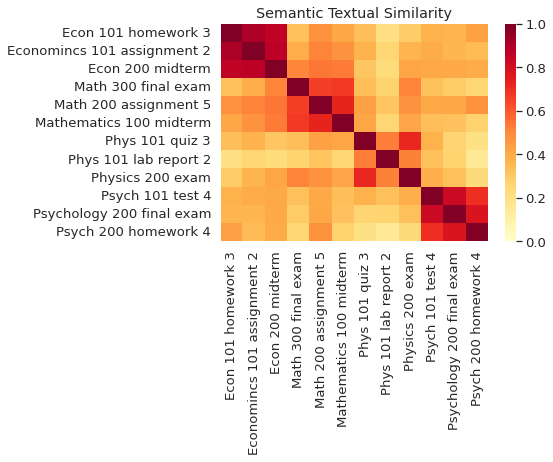

In [14]:
messages = [
    # Economics
    "Econ 101 homework 3",
    "Economincs 101 assignment 2",
    "Econ 200 midterm",

    # Math
    "Math 300 final exam",
    "Math 200 assignment 5",
    "Mathematics 100 midterm",

    # Physics
    "Phys 101 quiz 3",
    "Phys 101 lab report 2",
    "Physics 200 exam",

    # Psychology
    "Psych 101 test 4",
    "Psychology 200 final exam",
    "Psych 200 homework 4",
]

run_and_plot(messages)